<a href="https://colab.research.google.com/github/BohdanShepel2005/Mashynne-Navchannya/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%B7_%D0%9C%D0%9D_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
print("Завантаження CSV-файлу:")
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))


Завантаження CSV-файлу:


Saving diabetes.csv to diabetes (4).csv


In [ ]:
# №1: Виводжу перші 5 рядків
print("\n№1 Перші 5 рядків:")
display(df.head())



№1 Перші 5 рядків:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# №2: Перевіряю пропущені значень
print("\n№2 Пропущені значення у даних:")
print(df.isnull().sum())

# Заповнюю пропуски середнім значенням
df.fillna(df.mean(numeric_only=True), inplace=True)



№2 Пропущені значення у даних:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# №3: Перевіряю дублікати
print("\n№3 Перевірка дублікатів:")
print("Кількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)



№3 Перевірка дублікатів:
Кількість дублікатів: 0


In [ ]:
# №4: Перевіряю бінарні ознаки
if 'sex' in df.columns:
    print("\n№4 Унікальні значення у стовпці 'sex':", df['sex'].unique())
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [ ]:

# №5: Перевіряю типи даних
print("\n№5 Типи даних у таблиці:")
print(df.dtypes)

# Перетворюю на числові
df = df.apply(pd.to_numeric, errors='ignore')


№5 Типи даних у таблиці:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<ipython-input-15-b3d66068c7b7>:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')



№6 Кореляція з 'Outcome':
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


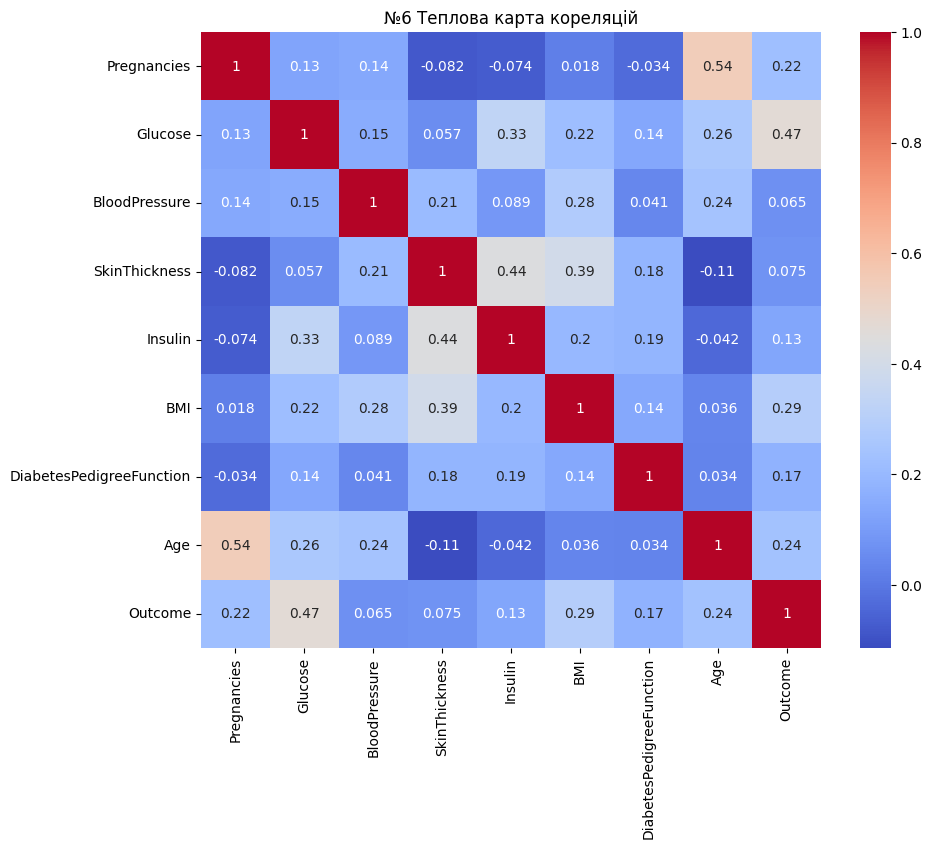

In [ ]:
# №6: Кореляція з цільовою змінною
target_column = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
correlation = df.corr()[target_column].sort_values(ascending=False)

print(f"\n№6 Кореляція з '{target_column}':")
print(correlation)

# Теплова карта
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('№6 Теплова карта кореляцій')
plt.show()


In [ ]:
# №7: Масштабую ознаки
features = correlation.index[1:6]  # Топ-5 ознак
print("\n№7 Масштабування ознак")
print("Вибрані ознаки для масштабування:", list(features))

X = df[features]
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


№7 Масштабування ознак
Вибрані ознаки для масштабування: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']


In [ ]:
# №8: Поділ на тренувальні та тестові
print("\n№8 Поділ на тренувальні та тестові вибірки")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Розмір X_train: {X_train.shape}, X_test: {X_test.shape}")


№8 Поділ на тренувальні та тестові вибірки
Розмір X_train: (614, 5), X_test: (154, 5)


In [ ]:
# №9: Будую моделі
print("\n№9 Навчання моделей")
print("Перевірка форми X_train:", X_train.shape)
print("Перевірка форми y_train:", y_train.shape)

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("\n№10 Коефіцієнт детермінації і середньоквадратична помилка:")

# Для Лінійної регресії
print("\n--- Лінійна регресія ---")
print("Коефіцієнт детермінації (R²):", r2_score(y_test, y_pred_lr))
print("Середньоквадратична помилка (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Для Random Forest
print("\n--- Random Forest ---")
print("Коефіцієнт детермінації (R²):", r2_score(y_test, y_pred_rf))
print("Середньоквадратична помилка (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


№9 Навчання моделей
Перевірка форми X_train: (614, 5)
Перевірка форми y_train: (614,)

№10 Коефіцієнт детермінації і середньоквадратична помилка:

--- Лінійна регресія ---
Коефіцієнт детермінації (R²): 0.25009865939396214
Середньоквадратична помилка (RMSE): 0.41493520718245813

--- Random Forest ---
Коефіцієнт детермінації (R²): 0.28639313131313116
Середньоквадратична помилка (RMSE): 0.40476945498433015


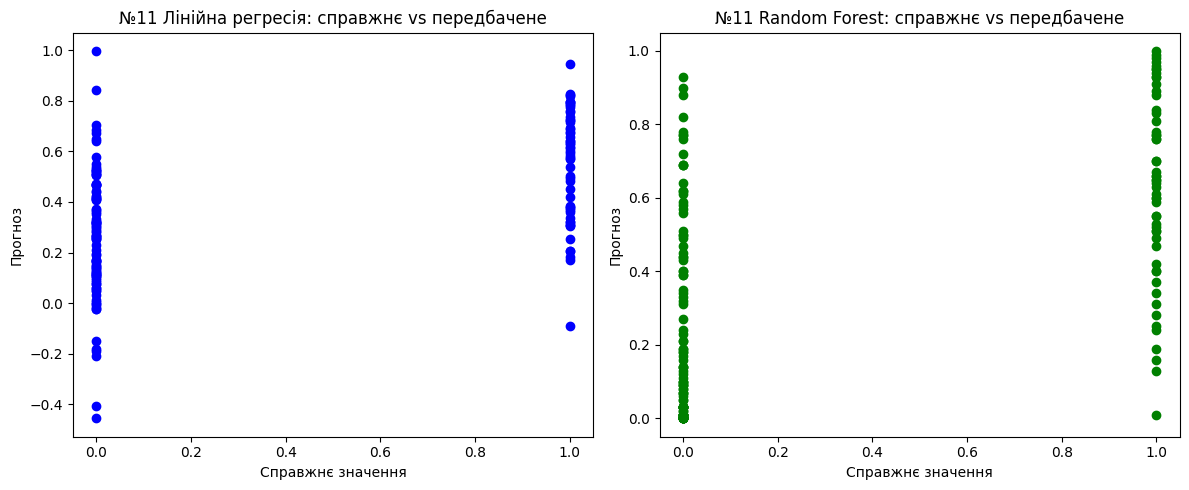

In [ ]:
# №11: Будую графіки
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.title("№11 Лінійна регресія: справжнє vs передбачене")
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.title("№11 Random Forest: справжнє vs передбачене")
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")

plt.tight_layout()
plt.show()

In [ ]:
# №12: Виводжу значення
print("\n№12 Порівняння значень:")
results = pd.DataFrame({
    'Справжнє': y_test.values,
    'Лін. регресія': y_pred_lr,
    'Random Forest': y_pred_rf
})
display(results.head(10))


№12 Порівняння значень:


,Справжнє,Лін. регресія,Random Forest
0,0,0.334512,0.44
1,0,0.229099,0.11
2,0,0.142359,0.01
3,0,0.266256,0.09
4,0,0.505691,0.62
5,0,0.470595,0.69
6,0,-0.180311,0.00
7,0,0.425341,0.72
8,0,0.523670,0.50
9,0,0.682677,0.78


In [ ]:
# №13: Висновки
print("\n№13 ВИСНОВКИ:")
print(f"""
 Я завантажив датасет та провів попередній аналіз даних.
Спочатку я завантажив CSV-файл, потім я провів перевірку на пропущені значення та дублікати,
наступним кроком заповнюю пропущені числові значення середнім, далі видаляю дублікати,
бінарну змінну sex перетворив у числовий формат,усі ознаки перевевів у числовий тип,
далі було проведено обчислення кореляційних коефіцієнтів між ознаками та цільовою змінною,
візуалізація кореляцій виконана за допомогою теплової карти.
Я обрав топ-5 найбільш корельованих ознак для побудови моделів також проведено стандартизацію ознак з використанням StandardScaler.
Дані були поділені на тренувальну та тестову вибірки у співвідношенні 80/20. Було задіяно дві моделі: Лінійну регресію та Random Forest,
проведено оцінку моделей за метриками: R² коефіцієнт детермінації та RMSE середньоквадратична помилка.
Будую графіки для того щоб порівняти справжні та передбачені значення для кожної моделі,
Створено таблицю з порівнянням перших 10 передбачень.
""")


№13 ВИСНОВКИ:

 Я завантажив датасет та провів попередній аналіз даних.
Спочатку я завантажив CSV-файл, потім я провів перевірку на пропущені значення та дублікати, 
наступним кроком заповнюю пропущені числові значення середнім, далі видаляю дублікати, 
бінарну змінну sex перетворив у числовий формат,усі ознаки перевевів у числовий тип, 
далі було проведено обчислення кореляційних коефіцієнтів між ознаками та цільовою змінною,
візуалізація кореляцій виконана за допомогою теплової карти. 
Я обрав топ-5 найбільш корельованих ознак для побудови моделів також проведено стандартизацію ознак з використанням StandardScaler. 
Дані були поділені на тренувальну та тестову вибірки у співвідношенні 80/20. Було задіяно дві моделі: Лінійну регресію та Random Forest, 
проведено оцінку моделей за метриками: R² коефіцієнт детермінації та RMSE середньоквадратична помилка. 
Будую графіки для того щоб порівняти справжні та передбачені значення для кожної моделі,
Створено таблицю з порівнянням перших 10 п